In [41]:
import math
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import scipy
# import seaborn as sns
from joblib import Parallel, delayed
from scipy.integrate import nquad, quad, simps
from scipy.stats import entropy, gamma, multivariate_normal, norm
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize
from sktree.datasets import make_trunk_classification
from sktree.ensemble import HonestForestClassifier
from sktree.stats import build_hyppo_oob_forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

## TRUNK Simulation

In [42]:
SIMULATIONS = {
    "1" : {},
    "2" : {"m_factor" : 1},
}

SAMP_SIZES = [2**i for i in range(7, 11)]
SAMP_SIZES_plot = [2*2**i for i in range(7, 11)]
DIM = 4 ** 6
REPS = range(100, 1000)
P = 4096
SAVE_PATH  = '/Users/baiyuxin/Desktop/JHU/NDD/Cancer/MightBootstrap'

In [16]:
n_jobs = -3
n_estimators = 500
est = HonestForestClassifier(
        n_estimators=n_estimators,
        max_features=1.6,
        bootstrap= True,
        tree_estimator=DecisionTreeClassifier(),
        # max_depth = 1,
        honest_fraction=0.5,
        stratify=True,
        # permute_per_tree=True,
        n_jobs=n_jobs,)

In [28]:
def sensitivity_at_specificity(y_true, y_score, target_specificity=0.98, pos_label=1):
    n_trees, n_samples, n_classes = y_score.shape

    # Compute nan-averaged y_score along the trees axis
    y_score_avg = np.nanmean(y_score, axis=0)

    # Extract true labels and nan-averaged predicted scores for the positive class
    y_true = y_true.ravel()
    y_score_binary = y_score_avg[:, 1]

    # Identify rows with NaN values in y_score_binary
    nan_rows = np.isnan(y_score_binary)

    # Remove NaN rows from y_score_binary and y_true
    y_score_binary = y_score_binary[~nan_rows]
    y_true = y_true[~nan_rows]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_score_binary, pos_label=pos_label)

    # Find the threshold corresponding to the target specificity
    index = np.argmax(fpr >= (1 - target_specificity))
    threshold_at_specificity = thresholds[index]

    # Compute sensitivity at the chosen specificity
    # sensitivity = tpr[index]
    # return sensitivity

    # Use the threshold to classify predictions
    y_pred_at_specificity = (y_score_binary >= threshold_at_specificity).astype(int)

    # Compute sensitivity at the chosen specificity
    sensitivity = np.sum((y_pred_at_specificity == 1) & (y_true == 1)) / np.sum(
        y_true == 1
    )

    return sensitivity

In [33]:
SAMP_SIZES = [2**i for i in range(7, 11)]
Reps = 5

## Trunk-Overlap, truth == 0.02

In [38]:
S98_array = np.zeros((Reps,len(SAMP_SIZES)))
for i in range(Reps):
    S98 = []
    for n in SAMP_SIZES:
        x,y,mu,cov = make_trunk_classification(n_samples=n, n_dim=2048, **SIMULATIONS["2"],return_params = True)
        x = np.float32(x)
        y = np.float32(y)
        est,prob = build_hyppo_oob_forest(est,x, y)
        print(prob.shape)
        sas98 = sensitivity_at_specificity(y, prob, target_specificity=0.98)
        print(sas98)
        S98.append(sas98)
    S98_array[i,:] = S98


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.03125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.0078125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.013671875


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.01171875


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.029296875


In [35]:
S98_array

array([[0.        , 0.0078125 , 0.015625  , 0.02539062],
       [0.015625  , 0.        , 0.02734375, 0.03125   ],
       [0.015625  , 0.015625  , 0.01171875, 0.01953125],
       [0.        , 0.        , 0.0078125 , 0.0078125 ],
       [0.        , 0.015625  , 0.00390625, 0.01953125]])

## Trunk, truth == 0.99808

In [46]:
S98_array_info = np.zeros((Reps,len(SAMP_SIZES)))
for i in range(Reps):
    S98 = []
    for n in SAMP_SIZES:
        x,y,mu,cov = make_trunk_classification(n_samples=n, n_dim=2048, **SIMULATIONS["1"],return_params = True)
        x = np.float32(x)
        y = np.float32(y)
        est,prob = build_hyppo_oob_forest(est,x, y)
        print(prob.shape)
        sas98 = sensitivity_at_specificity(y, prob, target_specificity=0.98)
        print(sas98)
        S98.append(sas98)
    S98_array_info[i,:] = S98


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 128, 2)
0.484375


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 256, 2)
0.5234375


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 512, 2)
0.640625


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.642578125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 128, 2)
0.53125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 256, 2)
0.3203125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 512, 2)
0.61328125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.69921875


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 128, 2)
0.3125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 256, 2)
0.6171875


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 512, 2)
0.63671875


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.62890625


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 128, 2)
0.390625


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 256, 2)
0.296875


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 512, 2)
0.58984375


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.673828125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 128, 2)
0.3125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 256, 2)
0.7265625


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 512, 2)
0.5703125


/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn tree so store_leaf_values cannot be set.
  warn("Using sklearn tree so store_leaf_values cannot be set.")
/Users/baiyuxin/anaconda3/lib/python3.11/site-packages/sktree/tree/_honest_tree.py:595: UserWarning: Using sklearn t

(500, 1024, 2)
0.705078125


In [47]:
S98_array_info

array([[0.484375  , 0.5234375 , 0.640625  , 0.64257812],
       [0.53125   , 0.3203125 , 0.61328125, 0.69921875],
       [0.3125    , 0.6171875 , 0.63671875, 0.62890625],
       [0.390625  , 0.296875  , 0.58984375, 0.67382812],
       [0.3125    , 0.7265625 , 0.5703125 , 0.70507812]])

[[0.03125    0.03125    0.03125    0.03125   ]
 [0.0078125  0.0078125  0.0078125  0.0078125 ]
 [0.01367188 0.01367188 0.01367188 0.01367188]
 [0.01171875 0.01171875 0.01171875 0.01171875]
 [0.02929688 0.02929688 0.02929688 0.02929688]]
[[0.03125    0.03125    0.03125    0.03125   ]
 [0.0078125  0.0078125  0.0078125  0.0078125 ]
 [0.01367188 0.01367188 0.01367188 0.01367188]
 [0.01171875 0.01171875 0.01171875 0.01171875]
 [0.02929688 0.02929688 0.02929688 0.02929688]]


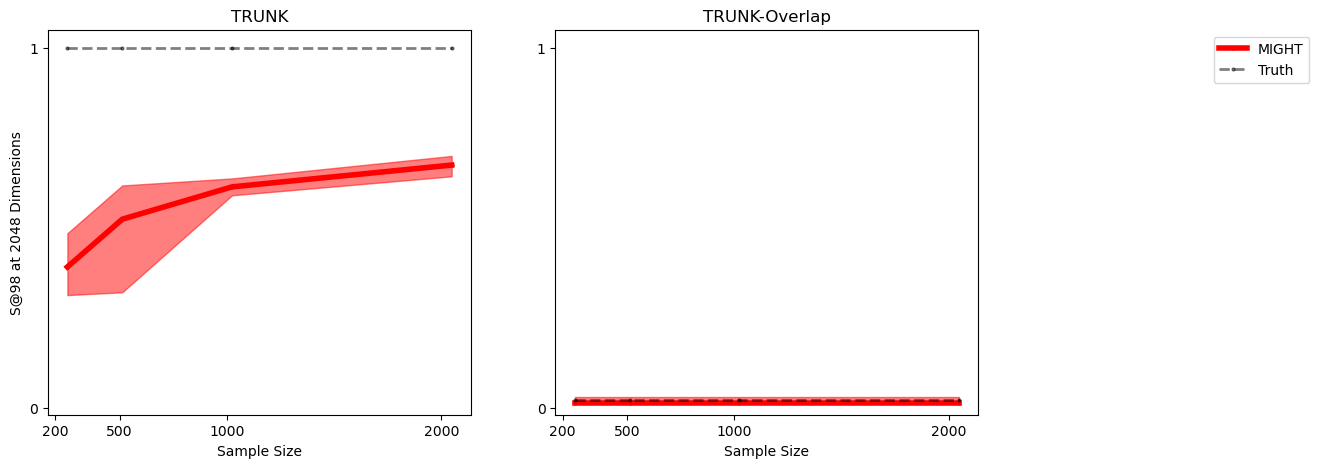

In [54]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 14))

SAMP_SIZES = [2**i for i in range(7, 11)]
SAMP_SIZES_plot = [2*2**i for i in range(7, 11)]


plt.rcParams["font.size"] = 10
fig, axs = plt.subplots(1, 2,figsize=(12, 5))
REPs = 5
ALPHA = 0.05



median_MIGHT_info = np.quantile(S98_array_info, 0.5, axis=0)
mean_MIGHT_info = np.mean(S98_array_info,axis = 0)
q25_MIGHT_info = np.quantile(S98_array_info, 0.25, axis=0)
q75_MIGHT_info = np.quantile(S98_array_info, 0.75, axis=0)
print(S98_array)
axs[0].plot(SAMP_SIZES_plot,median_MIGHT_info,
                        'r',marker='o', markersize=2,label = 'MIGHT',linewidth =4)
axs[0].fill_between(SAMP_SIZES_plot,q25_MIGHT_info,q75_MIGHT_info,
                                alpha = 0.5,color ='red')
axs[0].plot(SAMP_SIZES_plot, 0.998 * np.ones(len(SAMP_SIZES_plot)) , 'black',linestyle='dashed',marker='o', markersize=2,label = "Truth",linewidth =2,alpha = 0.5)



median_MIGHT = np.quantile(S98_array, 0.5, axis=0)
mean_MIGHT = np.mean(S98_array,axis = 0)
q25_MIGHT = np.quantile(S98_array, 0.25, axis=0)
q75_MIGHT = np.quantile(S98_array, 0.75, axis=0)
print(S98_array)
axs[1].plot(SAMP_SIZES_plot,median_MIGHT,
                        'r',marker='o', markersize=2,label = 'MIGHT',linewidth =4)
axs[1].fill_between(SAMP_SIZES_plot,q25_MIGHT,q75_MIGHT,
                                alpha = 0.5,color ='red')
axs[1].plot(SAMP_SIZES_plot, 0.02 * np.ones(len(SAMP_SIZES_plot)) , 'black',linestyle='dashed',marker='o', markersize=2,label = "Truth",linewidth =2,alpha = 0.5)



for sim in ["1","2"]:
    axs[int(sim)-1].set_ylim(-0.02, 1.05)
    axs[int(sim)-1].set_yticks([])
    axs[int(sim)-1].set_xticks([])
    axs[int(sim)-1].set_yticks([0, 1])
    axs[int(sim)-1].set_xticks([200,500,1000,2000])
    axs[int(sim)-1].set_xlabel("Sample Size")

    if sim == "1":
        axs[int(sim)-1].set_ylabel("S@98 at 2048 Dimensions")
        axs[int(sim)-1].set_title("TRUNK")
    if sim == "2":
         axs[int(sim)-1].set_title("TRUNK-Overlap")
         axs[int(sim)-1].legend(bbox_to_anchor = (1.8,1),loc = 'upper right')
        # np.savetxt("{}/null_dist_{}_{}_{}.txt".format(SAVE_PATH, sim, 'MIGHT',rep), obs_stats_samplesize, delimiter=",")
        # np.savetxt("{}/null_dist_{}_{}_{}.txt".format(SAVE_PATH, sim, 'MIGHT',rep), alt_stats_samplesize, delimiter=",")
    